분류 모형을 여러가지를 동시에 사용하는 방법. <br>
회귀분석에서는 여러개 테스트 하고 그 중에 좋은 것을 고를 순 있음(검증성능을 기준으로).<br>
그런데, classification에서는 동시에 여러개를 쓰는 것이 가능하다. <br>

고르는 문제이기 때문에 가능한 것. 회귀분석은 주관식 문제라서 10명이 다 다른 답을 낼 가능성이 높지만, <br>
분류문제는 객관식에서 고르는 것. 다수결에 따른 결정이 가능하다. 쏠리는 부분이 있다. <br>

실제로 모형을 결합하면 더 결과가 좋아지는 경향을 보인다. <br>

**성능 분산이 감소하는 경향을 보인다.** 

![1_84-2.jpeg](./materials/1_84.jpeg)

## 12.02 모형 결합

모형 결합(model combining) 방법은 앙상블 방법론(ensemble methods)이라고도 한다. 이는 특정한 하나의 예측 방법이 아니라 복수의 예측 모형을 결합하여 더 나은 성능의 예측을 하려는 시도이다. 

모형 결합 방법을 사용하면 일반적으로 계산량은 증가하지만 다음과 같은 효과가 있다.

* 단일 모형을 사용할 때 보다 성능 분산이 감소하고, 즉 과최적화를 방지한다.
* 개별 모형이 성능이 안좋을 경우에는 결합 모형의 성능이 더 향상된다(우등생은 혼자 푸나 같이 푸나 상관없는데, 평소에 80점 정도 맞던 사람들은 80점 10명이 모이면 높게 나올 확률이 높다, 단 *바보가 모이면 의미는 없다.* 아주 안 좋은 경우는 상관이 없음).

모형 결합 방법은 크게 나누어 취합(aggregation) 방법론과 부스팅(boosting) 방법론으로 나눌 수 있다.

* 취합 방법론은 사용할 모형의 집합이 이미 결정되어 있지만(여러개 사용할 모델 다 고정 되어 있다. 10명 같이 문제 푼다고 미리 정한다)
* 부스팅 방법론은 사용할 모형을 점진적으로 늘려간다(처음에 1명 풀다가, 2번째 와서 도와주고 3번째가 와서 도와주고 이런식으로).



- **단 여기서 차이점이 있다. 취합방법론은 10명이 똑같은 문제를 푼다. 그러나, 부스팅 방법론은 두번째 사람이 와서 첫번째 사람이 잘 못푼 문제에 집중한다. 세번째 사람은 1, 2번 사람이 잘 못 푸는 문제에 집중한다. 그래서, 부스팅 방법론에서는 서로 역할이 다르고 푸는 문제군이 다르다.**

각 방법론의 대표적인 방법들은 아래와 같다.

* 취합 방법론
 * 다수결 (Majority Voting)
 * 배깅 (Bagging)
 * 랜덤포레스트 (Random Forests)



* 부스팅 방법론
 * 에이다부스트 (AdaBoost)
 * 그레디언트 부스트 (Gradient Boost)
 
 
여기에서는 우선 취합 방법에 대해 살펴본다.

### 다수결 방법

다수결 방법은 가장 단순한 모형 결합 방법으로 전혀 다른 모형도 결합할 수 있다. 다수결 방법은 Hard Voting 과 Soft Voting 두 가지로 나뉘어진다. 

* hard voting: 단순 투표. 개별 모형의 결과 기준(누가뽑혔냐?만 물어본다. 한 사람마다 표 딱 1개. 공평하게 투표)
* soft voting: 가중치 투표. 개별 모형의 조건부 확률의 합 기준(각각 10표씩 가지고 있다. O에 8, X에 2 이렇게 줄 수 있다)

Scikit-Learn 의 ensemble 서브패키지는 다수결 방법을 위한 [`VotingClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) 클래스를 제공한다.
입력 인수는 다음과 같다.

* `estimators`: 개별 모형 목록, 리스트나 named parameter 형식으로 입력
* `voting`: 문자열 {`hard`, `soft`} hard voting 과 soft voting 선택. 디폴트는 `hard`
* `weights`: 사용자 가중치 리스트(특정 모델이 잘하면 걔한테 조금 더 가중치 줄 수 있지)

다음과 같은 예제 데이터를 가지는 이진 분류 문제를 생각해보자.

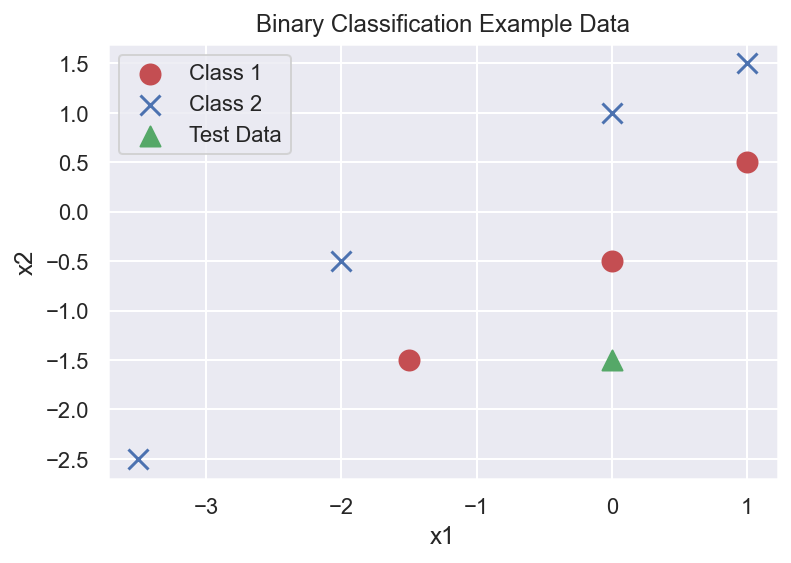

In [4]:
X = np.array([[0, -0.5], [-1.5, -1.5], [1, 0.5], [-3.5, -2.5], [0, 1], [1, 1.5], [-2, -0.5]])
y = np.array([1, 1, 1, 2, 2, 2, 2])
x_new = [0, -1.5]
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=100, marker='o', c='r', label="Class 1")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=100, marker='x', c='b', label="Class 2")
plt.scatter(x_new[0], x_new[1], s=100, marker='^', c='g', label="Test Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Binary Classification Example Data")
plt.legend()
plt.show()

이 문제를 세가지 다른 방법으로 풀어본다.

1. 로지스틱 회귀 모형
2. QDA 모형
3. 가우시안 나이브베이즈 모형

마지막으로 세가지 모형을 다수결로 합친 모형을 `VotingClassifier` 클래스로 만들었다. 다만 세가지 모형의 가중치가 각각 1, 1, 2로 가우시안 나이브베이즈 모형의 가중치를 높였다.

결과는 다음과 같아. 로지스틱 회귀 모형과 가우시안 나이브베이즈 모형은 클래스 1이라는 결과를 보이지만 QDA 모형은 클래스 2라는 결과를 보였다. 소프트 방식의 다수결 모형은 클래스 2라는 결론을 보인다. 만약 하드 방식의 다수결 모형이었다면 예측 결과는 클래스 1이 된다.

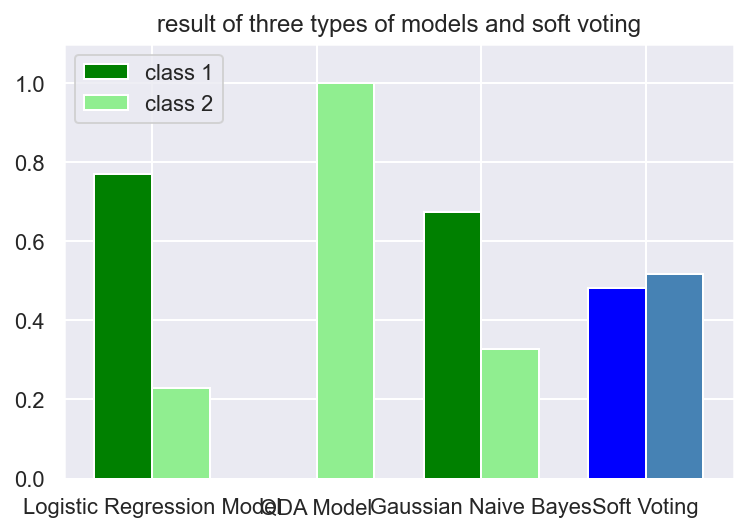

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()
ensemble = VotingClassifier(estimators=[('lr', model1), ('qda', model2), ('gnb', model3)], voting='soft')


probas = [c.fit(X, y).predict_proba([x_new]) for c in (model1, model2, model3, ensemble)]
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]

ind = np.arange(4)
width = 0.35  # bar width
p1 = plt.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color='green')
p2 = plt.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width, color='lightgreen')
p3 = plt.bar(ind, [0, 0, 0, class1_1[-1]], width, color='blue')
p4 = plt.bar(ind + width, [0, 0, 0, class2_1[-1]], width, color='steelblue')

plt.xticks(ind + 0.5 * width, ['Logistic Regression Model', 'QDA Model', 'Gaussian Naive Bayes', 'Soft Voting'])
plt.ylim([0, 1.1])
plt.title('result of three types of models and soft voting')
plt.legend([p1[0], p2[0]], ['class 1', 'class 2'], loc='upper left')
plt.show()

In [7]:
probas

[array([[0.7713643, 0.2286357]]),
 array([[9.59836414e-10, 9.99999999e-01]]),
 array([[0.67309197, 0.32690803]]),
 array([[0.48148542, 0.51851458]])]

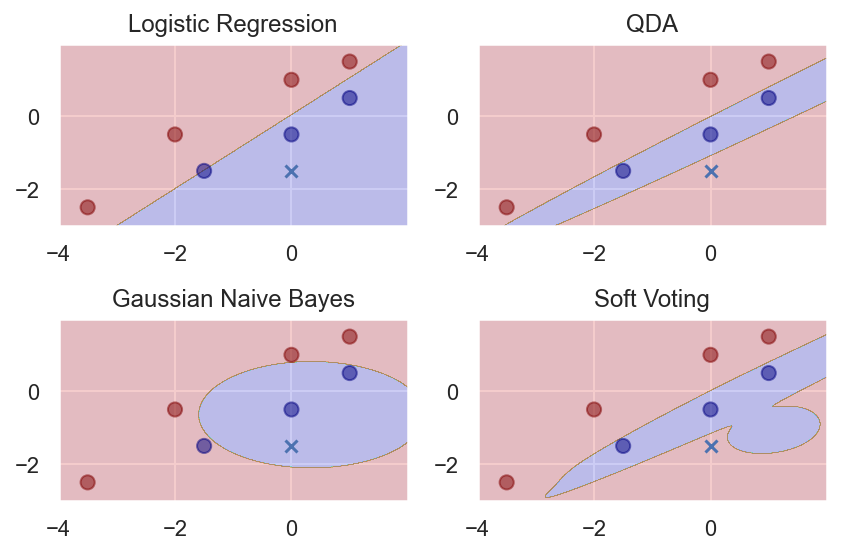

In [8]:
from itertools import product

x_min, x_max = -4, 2
y_min, y_max = -3, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.005),
                     np.arange(y_min, y_max, 0.005))
f, axarr = plt.subplots(2, 2)
for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [model1, model2, model3, ensemble],
                        ['Logistic Regression', 'QDA', 'Gaussian Naive Bayes', 'Soft Voting']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.2, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].scatter(
        X[:, 0], X[:, 1], c=y, alpha=0.5, s=50, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].scatter(x_new[0], x_new[1], marker='x')
    axarr[idx[0], idx[1]].set_title(tt)
plt.tight_layout()
plt.show()

그림을 보더라도, 가우시안나이브베이즈는 QDA에서 각 feature가 독립이라고 가정하는 것. <br>
그래서 그림 보면 각 축에 딱 정렬이 되지. 

근데 위에 보면, 지금 LR, GNB는 파란색이라고 얘기했고, QDA만 빨간색이라고 했는데, <br>
soft voting결과 보니깐, 빨간색이라고 예측하네?<br>
hard voting이였으면 파란색이 되야함. <br>
그런데, 지금 soft voting으로 잡았음. soft voting으로 잡으면 각각이 확률을 잡아줌. <br>
이것을 다 합쳐서 평균을 하니깐 QDA가 몰빵을 주는 바람에 soft voting에서 결과적으로 빨간색을 설정해 버린 것. <br>



![1_85.png](./materials/1_85.png)

**만약 hard voting방식에서 가중치까지 줬다면?**<br>

hard voting에서 model1, model2, model3이 각각 1번 2번 1번을 선택했다고 가정하자. <br>
그런데 사용자 가중치를 $1:3:1$로 했다면?<br>

결과적으로 합산하면 class1 2표, class2 3표<br>
가중치 주는 만큼 표 수가 생기는 것. 


**soft voting에서 가중치를 줬다면?**<br>
model1 : P(y=1) = 0.7, P(y=2) = 0.3<br>
model2 : P(y=1) = 0.1, P(y=2) = 0.9<br>
model3 : P(y=1) = 0.6, P(y=2) = 0.4<br>

가중치 안주고 원래 같았으면, 각 확률 합치면, $P(y=1)=1.4$, $P(y=1)=1.6$ 이렇게 되는 것. <br>
그런데, 가중치를 model 1에 2배로 줬다면?
model1 : P(y=1) = 1.4, P(y=2) = 0.6<br>
model2 : P(y=1) = 0.1, P(y=2) = 0.9<br>
model3 : P(y=1) = 0.6, P(y=2) = 0.4<br>

이렇게 되는 것. 

## 사실은
weights도 hyper parameter야. 좋은 weight가 나올 때 까지 우리가 튜닝을 해주는 것. <br>

그런데 성능이 왜 좋아질까? <br>
아래서 실험을 해보자. <br>
개별 모형이 정답을 출력할 확률을 P라고 놓고, 그런 모형을 N개를 모아서 그 N개가 서로 독립인 동전이라고 생각해 보자. <br>
모형 N개가 동전 N개가 있는 것. <br>
동전 앞면(H) 나오면 정답 맞춘 것. <br>

동전1의 $\mu=0.8$라면, 10번 풀면 8번 맞추는 동전.<br>
이렇게 해서 N개를 같이 던진다. <br>

3개 동시에 던졌는데, ${H, T, T}$ 나왔다. 그러면, 다수결로 하면 T 즉, 틀린 것. <br>

이제 이걸로 정답 출력할 확률을 계산하면 아래 식처럼 된다. <br>
N개중에 K개의 정답을 맞추는 확률이 아래 식. <br>

그런데, 다수결로 정답을 맞추려면, 정답을 맞춘애가 절반은 넘어야 겠지. <br>
그래서 시그마 아래 ${2/N}$개가 써 있는 것. <br><br>

즉, 아래 식은 절반 이상이 맞추는 경우의 확률. 

### 모형 결합을 사용한 성능 향상

다수결 모형이 개별 모형보다 더 나은 성능을 보이는 이유는 다음 실험에서도 확인 할 수 있다. 서로 다른 독립적인 모형이 있어야 한다. 

만약 개별 모형이 정답을 출력할 확률이 $p$인 경우에 서로 다르고 독립적인 모형을 $N$개 모아서 다수결 모형을 만들면 정답을 출력할 확률이 다음과 같아진다.


$$ \sum_{k>\frac{N}{2}}^N \binom N k p^k (1-p)^{N-k} $$ 

아래 그래프는, 위 식으로 계산을 한 것. <br>
개별모형의 성능이 0.6이라는 것은 개별 모형은 10문제 풀면 6문제 맞추는 모형이라는 것. <br>
<br>

점선은 혼자 있는 애. <br>
60점 맞는 애가 10명 모이면 점수가 80점이 넘어버리고, 100명을 모이니깐 거의 다 맞아. <br>

다만 아까도 말했지만, 정답률 0.5 미만인 경우 봐봐. <br>
합쳐도 의미가 없어. 40점 맞는 애들이 100명 모이니깐 0점이 되네. <br><br>

지금 결합 모델의 경우에는, y축이 위 식으로 확률 구한 것. 

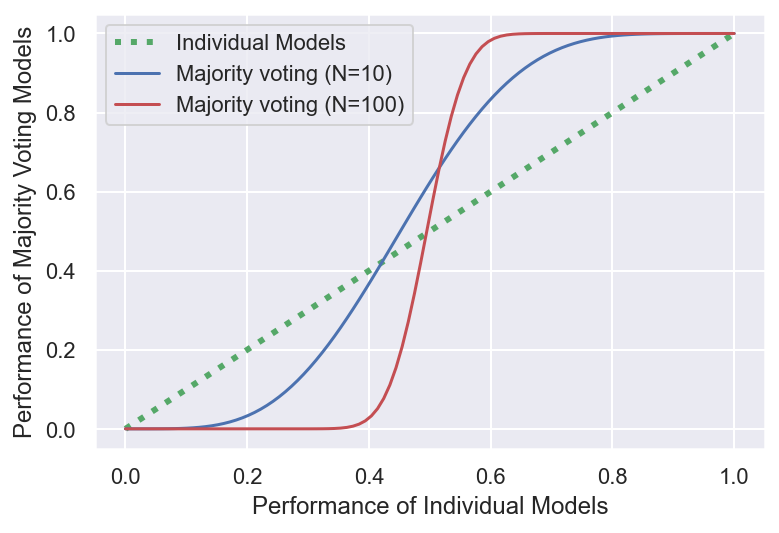

In [10]:
from scipy.special import comb

def total_error(p, N):
    te = 0.0
    for k in range(int(np.ceil(N/2)), N + 1):
        te += comb(N, k) * p**k * (1-p)**(N-k)
    return te


x = np.linspace(0, 1, 100)
plt.plot(x, x, 'g:', lw=3, label="Individual Models")
plt.plot(x, total_error(x, 10), 'b-', label="Majority voting (N=10)")
plt.plot(x, total_error(x, 100), 'r-', label="Majority voting (N=100)")
plt.xlabel("Performance of Individual Models")
plt.ylabel("Performance of Majority Voting Models")
plt.legend(loc=0)
plt.show()

지금 위에서 수식 보면, 독립적인 N개 모형의 p값이 다 동일하다고 가정되어 있는데, 그것은 단순 그림 단순화를 위해 그렇게 한것. <br>
p값이 당연히 서로서로 다르겠지. 그래도 그래프는 비슷하게 나타난다. 

**이거 되게 중요한 커브야.** <br>
우리는 지금까지 모형에 되게 집중했잖아. 개별 모형 높은 성능 내려고 엄청 노력했음. <br>
근데 이거 보니깐 딱히 그게 다가 아니야. <br>
50점 넘는 적당한 애들 모아서, 많이 모아오면 된다는 거야. <br>

단, 커브에서 y축 구하는 수식 보면 알겠지만 N개의 모형이 각각 독립적으로 의사결정을 해야 한다. <br>
남에꺼 보고 베끼면 100명 모이든 1000명 모이든 의미가 없어. <br>
서로가 서로에게 영향 안준다는 가정이 들어가있음. <br>

그리고, 모형이 모았는데, 성향이 비슷한애들끼리 모은다?<br>
그러면, logistic 10개 모아도 그냥 logistic이야. 어떻게든 다르게 만들어야돼. <br>
데이터를 아예 다르게 나눠주던가, 학습시키는 독립 변수를 나누던가. 등등. 

#### 연습 문제 1

iris를 voting 방법으로 풀어보자.

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
X1 = iris.data
y1 = iris.target

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()
ensemble = VotingClassifier(estimators=[('lr', model1), ('qda', model2), ('gnb', model3)], voting='soft')

ensemble.fit(X1, y1)
ensemble.predict(X1)

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y1, ensemble.predict(X1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [21]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(5, shuffle=True, random_state=0)
cross_val_score(ensemble, X1, y1, scoring="accuracy", cv=cv).mean()

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

0.96

모델의 갯수가 많아지면, 모델의 성능이 좋아지는데, 모델이 뭐 그렇다고 몇개나 알아?<br>
100개 모델씩 쓰는거는 대체 어떻게 쓰는거야? <br>

모델은 똑같은 것을 쓰되, 각 모형이 서로 다른 결과를 출력하는 다수의 모형을 만들어 간다. <br>
**모형은 똑같은데 데이터를 다른 것을 주는 것이 배깅.** 

### 배깅

앞서 모형 결합에서 사용하는 독립적인 모형의 수가 많을 수록 성능 향상이 일어날 가능성이 높다는 것을 알았다. 각각 다른 확률 모형을 사용하는데에는 한계가 있으므로 보통은 배깅 방법을 사용하여 같은 확률 모형을 쓰지만 서로 다른 결과를 출력하는 다수의 모형을 만든다.

배깅(bagging)은 동일한 모형과 모형 모수를 사용하는 대신 부트스트래핑(bootstrapping)과 유사하게 트레이닝 데이터를 랜덤하게 선택해서 다수결 모형을 적용한다.

트레이닝 데이터를 선택하는 방법에 따라 다음과 같이 부르기도 한다.

* 같은 데이터 샘플을 중복사용(replacement)하지 않으면: Pasting
* 같은 데이터 샘플을 중복사용(replacement)하면 Bagging
* 데이터가 아니라 다차원 독립 변수 중 일부 차원을 선택하는 경우에는: Random Subspaces
* 데이터 샘플과 독립 변수 차원 모두 일부만 랜덤하게 사용하면: Random Patches

성능 평가시에는 트레이닝용으로 선택한 데이터가 아닌 다른 데이터를 사용할 수도 있다. 이런 데이터를 OOB(out-of-bag) 데이터라고 한다.

![1_86.png](./materials/1_86.png)

그림 44.1 : 배깅

위 그림 보면, 각 사각형이 feature matrix. <br>
1. 첫번째 그림 보면, 각각 모형마다 다른 데이터를 준다. - **Pasting(데이터 서로 안겹치게 완전 쪼개서 나눠주는 경우), Bagging(데이터 서로 겹쳐지게 쪼개는 경우)**
2. 두번째 그림 보면 독립변수의 종류를 다른 것을 준다. - **Random Subspace**
3. 1/2를 섞어서 랜덤패치를 만든다. 일부 데이터+일부feature를 섞어서 패치를 만들어서 각 모형에 준다. - **Random Patches**

이렇게 하면, models의 수를 엄청 많이 늘릴 수 있다. 데이터 나눠주는 방법만 바꾸면 된다. 데이터 나눠주는 방법은 엄청 많지. 

Scikit-Learn 의  ensemble 서브패키지는 배깅 모형 결합을 위한 [`BaggingClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) 클래스를 제공한다. 사용법은 다음과 같다.

* `base_estimator`: 기본 모형
* `n_estimators`: 모형 갯수. 디폴트 10
* `bootstrap`: 데이터의 중복 사용 여부. 디폴트 True(데이터 겹쳐도 되는가?, True 배깅/False 페이스팅 (중복 할당 비허용)  )
* `max_samples`: 데이터 샘플 중 선택할 샘플의 수 혹은 비율. 디폴트 1.0. 즉, 랜덤하게 몇%씩 들어갈지(The number of samples to draw from X to train each base estimator (with replacement by default, see bootstrap for more details).)
* `bootstrap_features`: 특징 차원의 중복 사용 여부. 디폴트 False
* `max_features`: 다차원 독립 변수 중 선택할 차원의 수 혹은 비율 1.0(뭐 예를들면, 각 모델이 전체 독립변수중에 몇%정도 가질 수 있는지, 하나의 모델이 가져갈 수 있는 최대 칼럼 갯수를 의미, The number of features to draw from X to train each base estimator ( without replacement by default, see bootstrap_features for more details). 

`max_samples`: So, the BaggingClassifier you get back from GridSearchCV is fit to the full dataset of 891 data samples. It's true then, that with max_sample=1., each base estimator will randomly draw 891 samples from the training set. However, by default samples are drawn with replacement, so the number of unique samples will be less than the total number of samples due to duplicates. If you want to draw without replacement, set the bootstrap keyword of BaggingClassifier to false. 즉, `max_samples : 1.0' 이라고 써있으면, 전체 샘플 891개 중에, 891개를 뽑는 것. 그런데 **중복 추출**.


`max_features` : 이것도 features를 **중복추출** 하는 것. 원래 features가 5개 였으면, 5개를 중복추출 하는 것. 

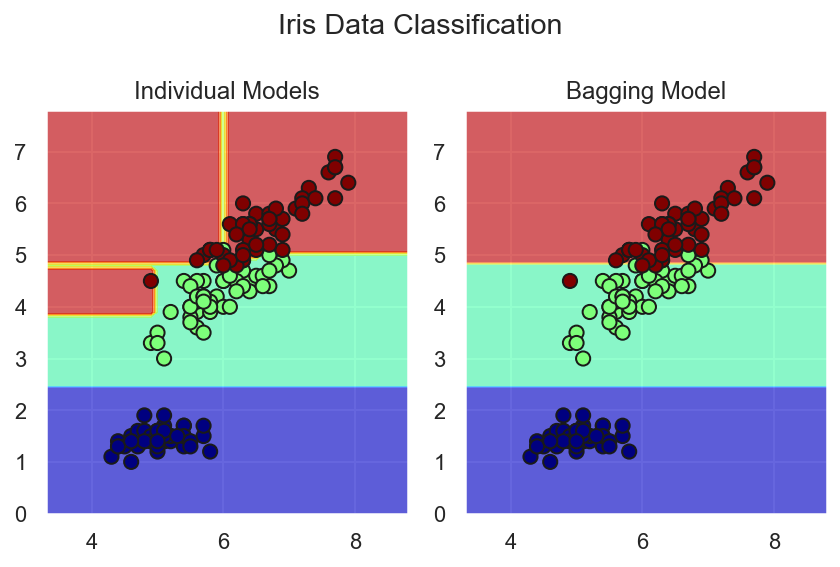

In [22]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

iris = load_iris()
X, y = iris.data[:, [0, 2]], iris.target

model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X, y)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=0).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
plt.subplot(121)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("Individual Models")
plt.subplot(122)
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("Bagging Model")
plt.suptitle("Iris Data Classification")
plt.tight_layout()
plt.show()

지금 individual model의 노란 점은 overfitting된거야. 빨간색 사이에 껴있는 초록색 점 때문에, 그거 하나 판단하려고 <br>
그런데, Bagging Model 보면 overfitting이 안 나왔음. <br>
그러면 다수의 모형에서는 Overfitting된 저 노란 선이 아니라고 말한건데, 왜 아니라고 했을까? <br>
저 노란선을 만든것은 중간에 껴있는 초록색. outlier에 가까워. <br>

지금 다수의 모델은 거기에 넣는 데이터를 나눌때, 저 초록색 점 아웃라이어 자체가 안들어간거야. <br>
소수의 데이터니깐, 대부분의 모델들은 저 아웃라이어 자체를 안가지고 있어. <br>
그래서, 오버피팅이 잘 안되는 것. <br>

결론적으로 오버피팅을 만들어내는 저런 이상한 데이터가 소수니깐 다수의 데이터에는 안들어가. <br>
그럼, 저 소수의 데이터를 받은 몇개 모델은 자기만의 방법으로 희한하게 오버피팅을 한다고 해도 다수결에서 밀리겠지. 

확률적으로, 한 5000개 데이터 중에 어떤 점이든 2개 딱 집고 이게 들어갔냐 안들어갔냐 따지면, 당연히 안들어간 모델이 훨씬 더 많겠지. outlier도 그런 의미에서 개를 안가지고 있는 모델들이 더 많다는 거야. 걔네가 다수결에서 우위를 점하고. 

그래서, 트레이닝 성능은 개별 모델이 더 좋을 수도 있어. 근데, test데이터 보면 오버피팅이 방지되서 성능이 좋겠지. 

#### 연습 문제 2

1. breast cancer 분류 문제를 Bagging을 사용하여 풀어라. 모형의 종류 및 개수나 Bagging 방법은 마음대로 한다. K=5인 교차 검증을 하였을 때 성능의 평균과 표준편차를 구하라.
2. bagging 모형의 성능을 개별 모형과 비교하라.

In [26]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()
X2 = bc.data
y2 = bc.target

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X2, y2)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100).fit(X2, y2)

from sklearn.model_selection import cross_val_score

0.9543238627542306

In [28]:
cross_val_score(model2, X2, y2, scoring="accuracy", cv=5).mean()

0.9490607048594939

In [29]:
cross_val_score(model1, X2, y2, scoring="accuracy", cv=5).mean()

0.9173730787144851

In [30]:
cross_val_score(model2, X2, y2, scoring="accuracy", cv=5).std()

0.023910056707608724

In [31]:
cross_val_score(model1, X2, y2, scoring="accuracy", cv=5).std()

0.01641972426994943

### 랜덤포레스트(Random Forest)

배깅 방법 중 하나인데, 조금 특이한 배깅 방법<br>
Decision Tree일때만 쓸 수 있는 배깅 방법. <br>

기본적으로는 Subspace방법을 쓴다. feature를 다르게 나눠준다. <br>

기존의 방법들은 데이터 딱 나눠주면 그걸로 끝. <br>

Decision Tree에서는 각 노드마다 2가지 일을 하지. 
1. feature 고르기
2. threshold 고르기

이거를 노드마다 반복하면서, 가장 좋은 기준값을 정하면서 아래로 내려가는게 Decision Tree잖아. 

![1_87.png](./materials/1_88.jpeg)

이렇게 하면 뭐가 좋을까? <br>
앞에서 했던 Decision Tree의 단점 중 하나가 Greedy한 선택이였음. <br>

무조건 각 노드에서 최선을 선택하니깐 전체적으로는 안 좋아지는 상황이 발생함. 더 좋은 상황이 가능한데, 그런것을 각 노드에서는 알 수가 없는 상황. <br>
즉, 다음 수를 모르고 제일 좋은 애만 골라. 전체입장에서는 더 비효율적인 결정일 수 있음. <br>

그러면, Random Forest는 애초에 feature를 전체를 다 주는게 아니잖아. <br>
그렇게 되면 각 노드에서 Decision Tree였으면 안골랐을 애가 뽑힐 가능성이 있음. <br>
2~3번째 잘하는 애가 첫번째 타석에 나갈 기회를 얻을 수가 있는 것. <br>
**그런 기회를 원천적으로 차단하지 않는 다는 것.** <br>
Greedy한 선택으로 가장 좋은 기회를 박탈시켜버리지 않는다는 것. 


극단적으로 하면, `Extremely Randomized Tree`도 있음. <br>
원래는 feature를 나눠서 줬어도, 그 받은 feature $x_1$-$x_10$중에서는 그래도 제일 좋은 놈을 뽑는 거잖아. <br>
그런데 이 방법에서는 그냥 주사위 던져서 아무나 내보내는 거야. <br>
대신, Threshold는 좋은 것 찾지. <br>
이렇게 하면? <br>
Decision Tree를 쓰면 이렇게 하나 저렇게 하나 첫번째에 선택되는 애가 비슷해. 그러면 걔로 인해서 아랫단계에서 생기는 현상이 유사해지겠지. <br>
그러면, 모델이 서로 비슷해지면서 모델 사이 독립성이 줄어든다. <br>
그런데, 정말 그냥 랜덤하게 주사위 던져서 내보내면? 적어도 모든 타자가 비슷한 횟수 만큼 타석에 나가겠지. <br>
1. Greedy한 선택에 의한 최적 선택 차단할 확률을 줄일 수 있음. 
2. 일단 기회는 다 똑같이 줬어. 선수가 얼마나 잘했는지 못했는지 판단할때 최소한 공평하게 판단할 수 있다. 맨날 벤치에만 있었는데 타점 판단하면 억울하잖아. 그 판단이 우리한테는 Information Gain을 total로 얼마나 많이 획득했는지를 누적을 해서 쌓아보고 계산할 수 있지. 그게 타점이 되겠지. 그럼, 이 문제를 풀때 어떤 애가 중요한 애고 어떤 애가 아닌 애 인지를 판단할 수가 있게 된다. 



**Extreme Random Forest를 쓰면 Feature Importance를 그릴 수 있다.**

랜덤포레스트(Random Forest)는 의사 결정 나무(Decision Tree)를 개별 모형으로 사용하는 모형 결합 방법을 말한다.

랜덤포레스트는 데이터 특징차원의 일부만 선택하여 사용한다. 하지만 노드 분리시 모든 독립 변수들을 비교하여 최선의 독립 변수를 선택하는 것이 아니라 독립 변수 차원을 랜덤하게 감소시킨 다음 그 중에서 독립 변수를 선택한다. 이렇게 하면 개별 모형들 사이의 상관관계가 줄어들기 때문에 모형 성능의 변동이 감소하는 효과가 있다.

이러한 방법을 극단적으로 적용한 것이 Extremely Randomized Trees 모형으로 이 경우에는 각 노드에서 랜덤하게 독립 변수를 선택한다.

![1_87.png](./materials/1_87.png)

그림 44.2 : 랜덤포레스트

랜덤포레스트와 Extremely Randomized Trees 모형은 각각 RandomForestClassifier클래스와 ExtraTreesClassifier 클래스로 구현되어 있다.

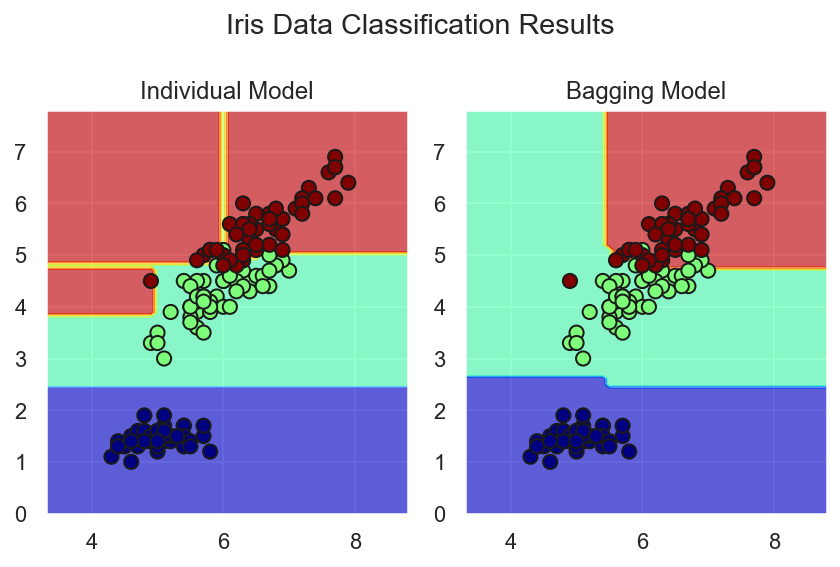

In [41]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X, y = iris.data[:, [0, 2]], iris.target

model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X, y)
model2 = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
plt.subplot(121)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("Individual Model")
plt.subplot(122)
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("Bagging Model")
plt.suptitle("Iris Data Classification Results")
plt.tight_layout()
plt.show()

랜덤포레스트의 장점 중 하나는 각 독립 변수의 중요도(feature importance)를 계산할 수 있다는 점이다.

포레스트 안에서 사용된 모든 노드에 대해 어떤 독립 변수를 사용하였고 그 노드에서 얻은 information gain을 구할 수 있으므로 각각의 독립 변수들이 얻어낸 information gain의 평균을 비교하면 어떤 독립 변수가 중요한지를 비교할 수 있다.

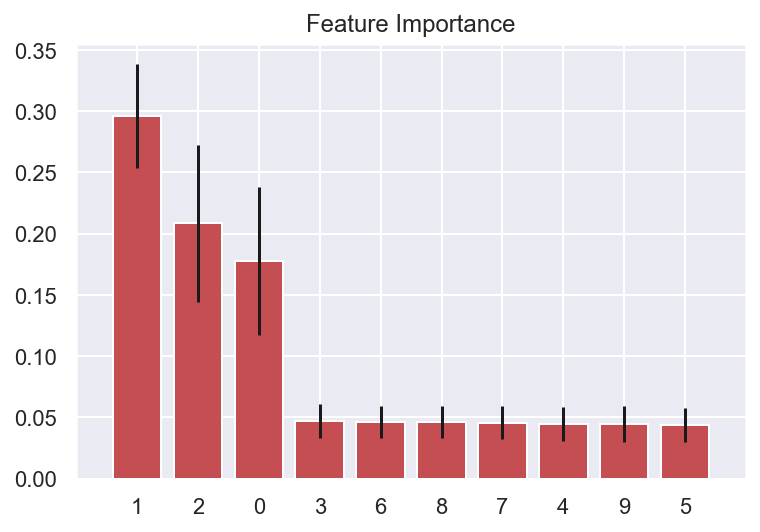

In [43]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_redundant=0, n_repeated=0,
                           n_classes=2, random_state=0, shuffle=False)

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

랜덤포레스트 학습 시키고, 나서 해당 feature가 기준으로 골라진 노드들과 그 노드가 해준 IG를 싹다 누적시킨 다음에, <br>
비율로 나타내준 것. 현재 모형 250개 만든 상태니깐, 걔네들꺼 싹다 더한것. <br>
그 비율을 나타낸 표. 

아래 코드는 Extra말고, 일반 RandomForest에서도 feature_importance_가 가능한지 체크. <br>
단 이때는, 기회가 모두에게 공정하지는 않았다.

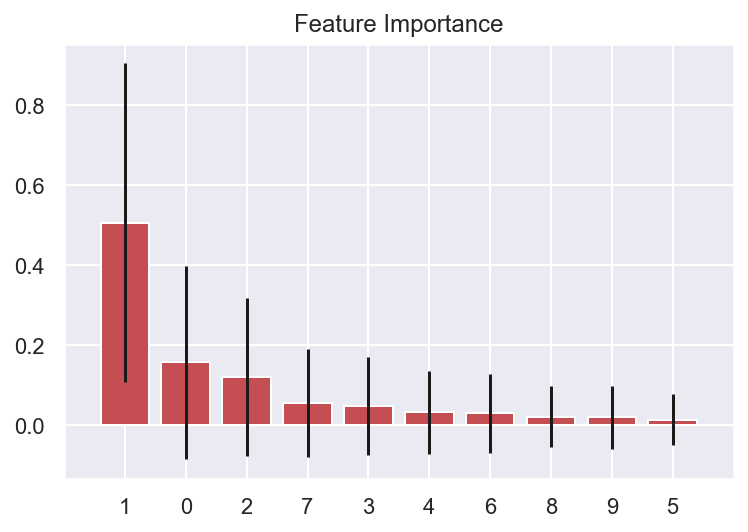

In [44]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(max_depth=2, n_estimators=250, random_state=0).fit(X, y)
model2.fit(X,y)


importances = model2.feature_importances_

std = np.std([tree.feature_importances_ for tree in model2.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [55]:
model2.feature_importances_

array([0.15690787, 0.50632592, 0.11973753, 0.04723912, 0.03187792,
       0.01379402, 0.02929637, 0.05442275, 0.02100504, 0.01939347])

In [53]:
print(np.array([tree.feature_importances_ for tree in model2.estimators_]).shape)
[tree.feature_importances_ for tree in model2.estimators_]

(250, 10)


[array([0.59865646, 0.18535954, 0.        , 0.        , 0.        ,
        0.        , 0.21598399, 0.        , 0.        , 0.        ]),
 array([0.34254632, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.65745368, 0.        , 0.        ]),
 array([0.03184101, 0.96815899, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([0.53960694, 0.        , 0.        , 0.29745457, 0.        ,
        0.1629385 , 0.        , 0.        , 0.        , 0.        ]),
 array([0.55577737, 0.        , 0.        , 0.22218812, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.22203451]),
 array([0.25477762, 0.73552796, 0.        , 0.        , 0.00969443,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([0.        , 0.86872608, 0.13127392, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([0.02305759, 0.91699163, 0.

다음 코드는 올리베티 얼굴 사진을 Extreme 랜덤포레스트로 구한 뒤 특징(픽셀) 중요도를 이미지로 나타낸 것이다. 

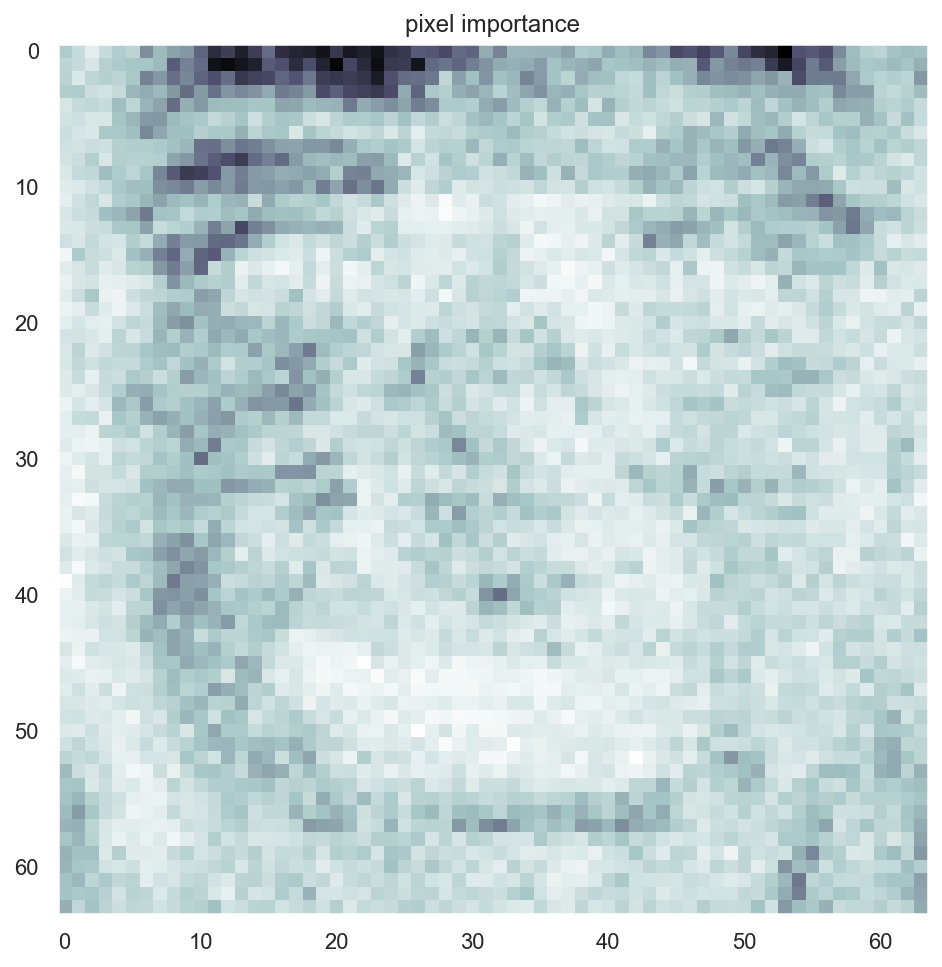

In [35]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier

data = fetch_olivetti_faces()
X = data.data
y = data.target

forest = ExtraTreesClassifier(n_estimators=1000, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_
importances = importances.reshape(data.images[0].shape)

plt.figure(figsize=(8, 8))
plt.imshow(importances, cmap=plt.cm.bone_r)
plt.grid(False)
plt.title("pixel importance")
plt.show()

진하게 되있는게, 더 중요한 애들이라는 뜻. 얼굴 윤곽선 따라서 진하게 나왔네. 근데 배경쪽도 까맣게 나왔네. 이게 바로 overfitting된거야. <br>
이 사람 찍을때만 배경에 뭐가 있었던거야. <br>

이런거 해결하는 방법이 이 사람 얼굴, 평행이동/회전/확대/축소/좌우반전 등으로 가짜 사진을 엄청 많이 만든다.<br>
그럼 배경이 서로 달라지거나 특정 사진에만 나오겠지. image augmentation.이라고 함. <br>
이런 방법을 많이 쓴다. 

#### 연습 문제 3

1. breast cancer 분류 문제를 Extreme 랜덤포레스트를 사용하여 풀어라. K=5인 교차 검증을 하였을 때 평균 성능을 구하라.
2. 특징 중요도를 구하라. 어떤 특징들이 판별에 중요하게 사용되는가?

In [36]:
# 연습문제 1

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

model1 = LogisticRegression()
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()
model4 = DecisionTreeClassifier()
model = VotingClassifier(
    estimators=[('lr', model1), ('qda', model2), ('gnb', model3)], 
    voting='soft', weights=[1, 1.5, 1])

cv = KFold(5, shuffle=True, random_state=0)
accuracy = cross_val_score(model, X, y, scoring="accuracy", cv=cv)
accuracy.mean(), accuracy.std()

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

(0.9701288619779536, 0.01718014420762386)

In [37]:
from sklearn.ensemble import BaggingClassifier

model1 = DecisionTreeClassifier(max_depth=5)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=100)
accuracy1 = cross_val_score(model1, X, y, scoring="accuracy", cv=cv)
accuracy2 = cross_val_score(model2, X, y, scoring="accuracy", cv=cv)
accuracy1.mean(), accuracy1.std(), accuracy2.mean(), accuracy2.std()

(0.9332401800962582,
 0.017114187486630416,
 0.9560937742586555,
 0.02144889105037021)

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=500, random_state=0).fit(X, y)
accuracy = cross_val_score(forest, X, y, scoring="accuracy", cv=cv)
accuracy.mean(), accuracy.std()

(0.9701754385964911, 0.020459480332790547)

In [40]:
np.argsort(forest.feature_importances_)

array([14, 11, 18, 19,  9, 15,  8, 16, 29, 17,  4, 28, 10, 12, 24,  5,  1,
       21, 25, 13, 26,  6,  3,  0,  2,  7, 23, 22, 20, 27])

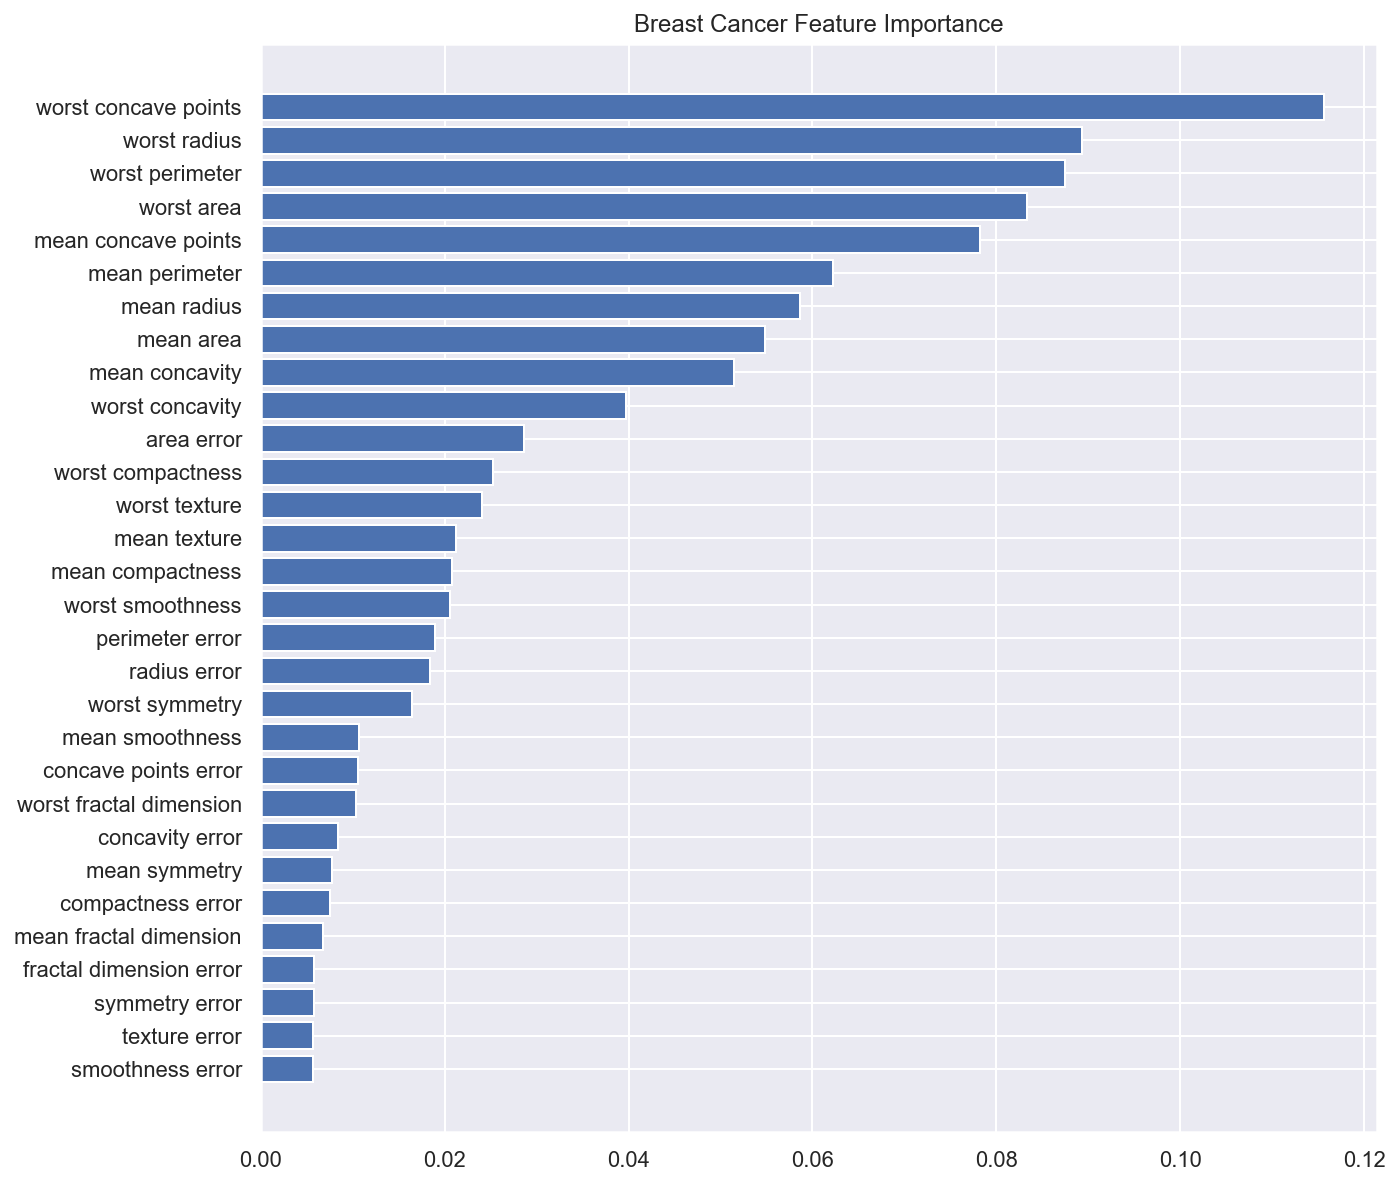

In [39]:
idx = np.argsort(forest.feature_importances_)
names = cancer.feature_names[idx]
values = forest.feature_importances_[idx]

plt.figure(figsize=(10, 10))
plt.barh(names, values)
plt.title("Breast Cancer Feature Importance")
plt.show()